In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt

date_time = "2023-07-05_20:29"
date_time = "2023-07-10_19:18"
date_time = "2023-07-10_19:51"
date_time = "2023-07-10_21:09"

root_results_dir = "/projects/genomic-ml/da2343/ml_project_2/hpc/results"
df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")

In [2]:
df

,mean_mape,std_mape,train_size,dataset_name,algorithm,fh,window_size,sma
0,0.001228,0.001019,67200,EURUSD_H1,LinearRegression,120,600,200
1,0.001485,0.001209,16800,EURUSD_H1,LinearRegression,120,600,200
2,0.001375,0.001109,33600,EURUSD_H1,LinearRegression,120,390,200
3,0.001227,0.001010,67200,EURUSD_H1,LinearRegression,120,450,200
4,0.001327,0.001081,33600,EURUSD_H1,LinearRegression,120,600,200
5,0.001516,0.001218,16800,EURUSD_H1,LinearRegression,120,360,200
6,0.001278,0.001043,67200,EURUSD_H1,LinearRegression,120,390,200
7,0.001360,0.001095,33600,EURUSD_H1,LinearRegression,120,330,200
8,0.001267,0.001034,67200,EURUSD_H1,LinearRegression,120,360,200
9,0.001218,0.001010,67200,EURUSD_H1,LinearRegression,120,570,200


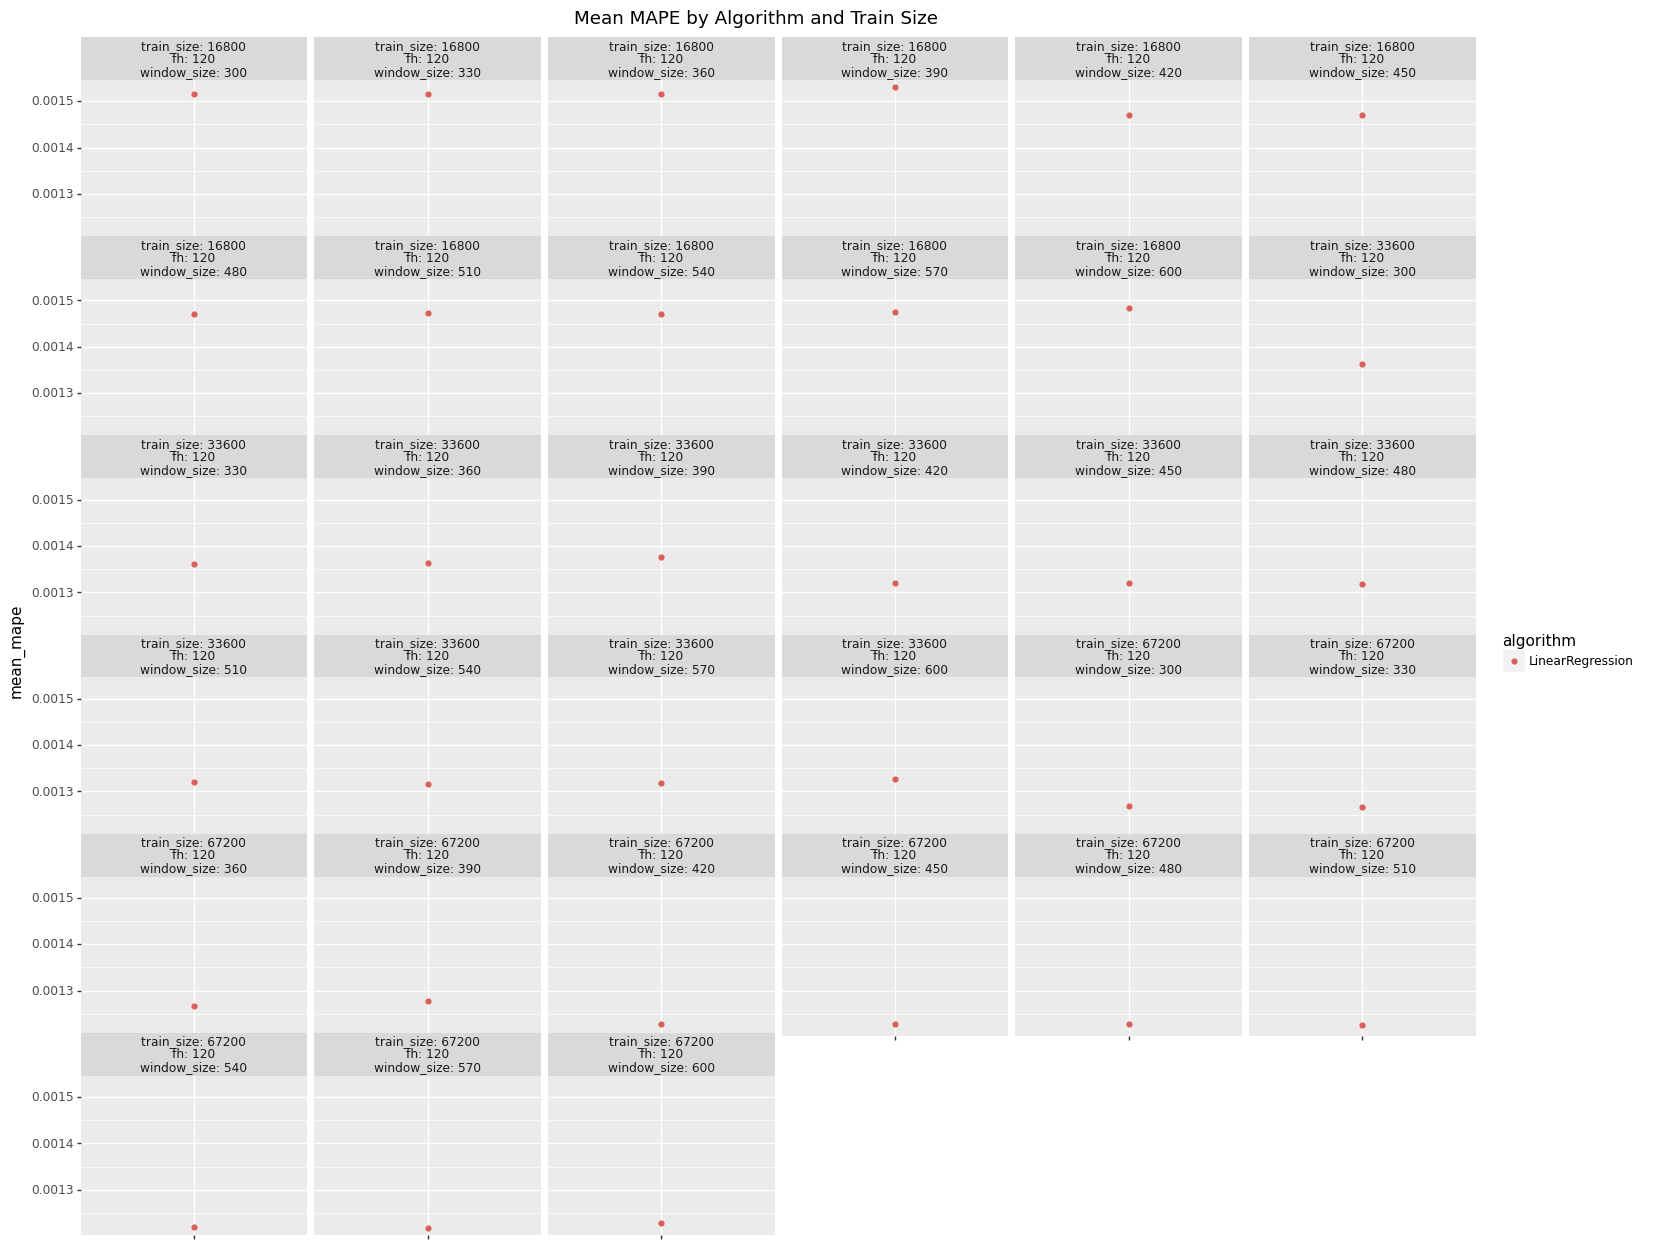

<ggplot: (1446649161201)>

In [3]:
# Import pandas and plotnine
import pandas as pd
from plotnine import *

# filter df only where sma is 200   and fh is 168
# my_df = df[(df["sma"] == 200) & (df["fh"] == 168)]
# my_df = df[(df["window_size"] >= 200) & (df["fh"] == 120)]
my_df = df.copy()

# geom_errorbar(aes(ymin="mean_mape-std_mape", ymax="mean_mape+std_mape")) +
# Draw a line plot with error bars and facet by train_size
p = (ggplot(my_df, aes(x="algorithm", y="mean_mape", color="algorithm")) +
     geom_point(aes(group="dataset_name")) +
     facet_wrap("~train_size + fh + window_size",  labeller=label_both) +
     labs(x="algorithm", y="mean_mape") +
     theme(axis_text_x=element_blank(), axis_title_x=element_blank(), subplots_adjust={'hspace': 0.25}, figure_size=(18, 15)) +
     ggtitle("Mean MAPE by Algorithm and Train Size"))
# save plot
# p.save(f"{root_results_dir}/{date_time}_results.png", dpi=300)
p
